In [70]:
import numpy as np
import pandas as pd

import tensorflow as tf

In [71]:
data = pd.read_csv('daily_rv_daily_data2.csv')

In [72]:
data

,Date,AAPL.O,MSFT.O,GOOGL.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
0,1/2/2013,0.394759,0.204164,0.160624,0.259588,0.255805,0.417448,0.175771,0.303948,0.195200,...,0.195187,0.293085,0.305850,0.137254,0.171489,0.145849,0.233725,0.148091,0.200371,0.170832
1,1/3/2013,0.395757,0.208856,0.159135,0.258251,0.243873,0.399197,0.174278,0.300405,0.195320,...,0.192092,0.302253,0.295365,0.166521,0.177504,0.143627,0.218913,0.147615,0.210676,0.171212
2,1/4/2013,0.402038,0.220225,0.167490,0.257017,0.248701,0.413483,0.171509,0.293261,0.230610,...,0.192161,0.297705,0.295445,0.166560,0.179663,0.145369,0.218888,0.146414,0.222877,0.171222
3,1/7/2013,0.332536,0.216903,0.167327,0.282636,0.269675,0.419015,0.173562,0.292516,0.230156,...,0.188114,0.301152,0.283465,0.166091,0.175517,0.143705,0.231562,0.144032,0.222388,0.173660
4,1/8/2013,0.327239,0.217523,0.168126,0.284468,0.283448,0.408740,0.172781,0.300155,0.230088,...,0.188147,0.307200,0.298759,0.165878,0.174623,0.143895,0.239140,0.150114,0.226609,0.183130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,12/22/2023,0.142644,0.152017,0.265722,0.183732,0.300429,0.251188,0.112377,0.328612,0.221377,...,0.191848,0.305120,0.174392,0.160872,0.229185,0.141688,0.156342,0.246544,0.243801,0.154808
2764,12/26/2023,0.140558,0.152010,0.260776,0.183770,0.293185,0.247934,0.111985,0.331389,0.217250,...,0.193363,0.309648,0.173624,0.160862,0.227223,0.143380,0.156762,0.245336,0.244412,0.156492
2765,12/27/2023,0.140424,0.151528,0.262720,0.183184,0.291714,0.244286,0.111528,0.335122,0.223289,...,0.194650,0.310221,0.194757,0.159658,0.226558,0.142111,0.156581,0.247162,0.244470,0.155199
2766,12/28/2023,0.140256,0.146611,0.262335,0.181752,0.289482,0.241846,0.111248,0.326578,0.223265,...,0.194603,0.303298,0.195234,0.158004,0.226790,0.142477,0.137460,0.243547,0.243149,0.149851


In [73]:
data = data.rename(columns={"Unnamed: 0": "Date"})

In [74]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1/10/2024')
datetime_object

datetime.datetime(2024, 1, 10, 0, 0)

In [75]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-07
4      2013-01-08
          ...    
2763   2023-12-22
2764   2023-12-26
2765   2023-12-27
2766   2023-12-28
2767   2023-12-29
Name: Date, Length: 2768, dtype: datetime64[ns]

In [76]:
data.index = data.pop('Date')
data

,AAPL.O,MSFT.O,GOOGL.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,V,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.394759,0.204164,0.160624,0.259588,0.255805,0.417448,0.175771,0.303948,0.195200,0.171026,...,0.195187,0.293085,0.305850,0.137254,0.171489,0.145849,0.233725,0.148091,0.200371,0.170832
2013-01-03,0.395757,0.208856,0.159135,0.258251,0.243873,0.399197,0.174278,0.300405,0.195320,0.167979,...,0.192092,0.302253,0.295365,0.166521,0.177504,0.143627,0.218913,0.147615,0.210676,0.171212
2013-01-04,0.402038,0.220225,0.167490,0.257017,0.248701,0.413483,0.171509,0.293261,0.230610,0.165692,...,0.192161,0.297705,0.295445,0.166560,0.179663,0.145369,0.218888,0.146414,0.222877,0.171222
2013-01-07,0.332536,0.216903,0.167327,0.282636,0.269675,0.419015,0.173562,0.292516,0.230156,0.166345,...,0.188114,0.301152,0.283465,0.166091,0.175517,0.143705,0.231562,0.144032,0.222388,0.173660
2013-01-08,0.327239,0.217523,0.168126,0.284468,0.283448,0.408740,0.172781,0.300155,0.230088,0.167718,...,0.188147,0.307200,0.298759,0.165878,0.174623,0.143895,0.239140,0.150114,0.226609,0.183130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.142644,0.152017,0.265722,0.183732,0.300429,0.251188,0.112377,0.328612,0.221377,0.110596,...,0.191848,0.305120,0.174392,0.160872,0.229185,0.141688,0.156342,0.246544,0.243801,0.154808
2023-12-26,0.140558,0.152010,0.260776,0.183770,0.293185,0.247934,0.111985,0.331389,0.217250,0.110698,...,0.193363,0.309648,0.173624,0.160862,0.227223,0.143380,0.156762,0.245336,0.244412,0.156492
2023-12-27,0.140424,0.151528,0.262720,0.183184,0.291714,0.244286,0.111528,0.335122,0.223289,0.110747,...,0.194650,0.310221,0.194757,0.159658,0.226558,0.142111,0.156581,0.247162,0.244470,0.155199


In [77]:
def df_to_X_Y(df, window_size=21):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size]]
    y.append(label)
  return np.array(X), np.array(y)

In [78]:
X, Y = df_to_X_Y(data)
X.shape, Y.shape

((2747, 21, 97), (2747, 1, 97))

In [65]:
X[0].shape

(21, 97)

In [79]:
q_80 = int(len(data.index) * .8)
q_90 = int(len(data.index) * .9)

X_train, Y_train =  X[:q_80], Y[:q_80]

X_val, Y_val =  X[q_80:q_90], Y[q_80:q_90]
X_test, Y_test =  X[q_90:], Y[q_90:]

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((21, 97)),
                    layers.LSTM(64),
                    layers.Dense(97)])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 64)                │     41,472 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 97)                │      6,305 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 47,777 (186.63 KB)

 Trainable params: 47,777 (186.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras import ops

def qlike(y_true, y_pred):
    sum = ops.log(y_pred+1e-16) + y_true/y_pred
    return ops.mean(sum, axis=-1)  # Note the `axis=-1`

In [82]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

In [83]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0384 - mean_absolute_error: 0.1345 - val_loss: 0.0201 - val_mean_absolute_error: 0.1021
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0189 - mean_absolute_error: 0.0845 - val_loss: 0.0181 - val_mean_absolute_error: 0.0955
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0188 - mean_absolute_error: 0.0855 - val_loss: 0.0204 - val_mean_absolute_error: 0.1037
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0203 - mean_absolute_error: 0.0861 - val_loss: 0.0182 - val_mean_absolute_error: 0.0967
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0171 - mean_absolute_error: 0.0825 - val_loss: 0.0178 - val_mean_absolute_error: 0.0953
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0881 - val_loss: 0.0181 - val_mean_absolute_error: 0.0963
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0833 - v

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0801 - val_loss: 0.0205 - val_mean_absolute_error: 0.1039
Epoch 46/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0812 - val_loss: 0.0204 - val_mean_absolute_error: 0.1040
Epoch 47/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0182 - mean_absolute_error: 0.0829 - val_loss: 0.0188 - val_mean_absolute_error: 0.0983
Epoch 48/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0205 - mean_absolute_error: 0.0856 - val_loss: 0.0186 - val_mean_absolute_error: 0.0974
Epoch 49/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0827 - val_loss: 0.0173 - val_mean_absolute_error: 0.0930
Epoch 50/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0859 - val_loss: 0.0182 - val_mean_absolute_error: 0.0966
Epoch 51/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0174 - mean_absolute_error: 0.0822 - val_los

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0834 - val_loss: 0.0222 - val_mean_absolute_error: 0.1097
Epoch 90/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0864 - val_loss: 0.0195 - val_mean_absolute_error: 0.1002
Epoch 91/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0826 - val_loss: 0.0181 - val_mean_absolute_error: 0.0956
Epoch 92/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0837 - val_loss: 0.0201 - val_mean_absolute_error: 0.1026
Epoch 93/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0884 - val_loss: 0.0219 - val_mean_absolute_error: 0.1089
Epoch 94/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0842 - val_loss: 0.0187 - val_mean_absolute_error: 0.0978
Epoch 95/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0836 - val_los

In [84]:
test_predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [85]:
mse = tf.keras.losses.MeanSquaredError()

In [86]:
mse(Y_test, test_predictions).numpy()

0.0070604626

In [33]:
def qlike(y_true, y_pred):
    np.log(y_pred+1e-16) + y_true/y_pred

In [32]:
qlike(Y_test, test_predictions)

In [37]:
np.mean(np.log(test_predictions+1e-16) - Y_test/test_predictions)

-2.433345400143295

AttributeError: module 'matplotlib' has no attribute 'grid'

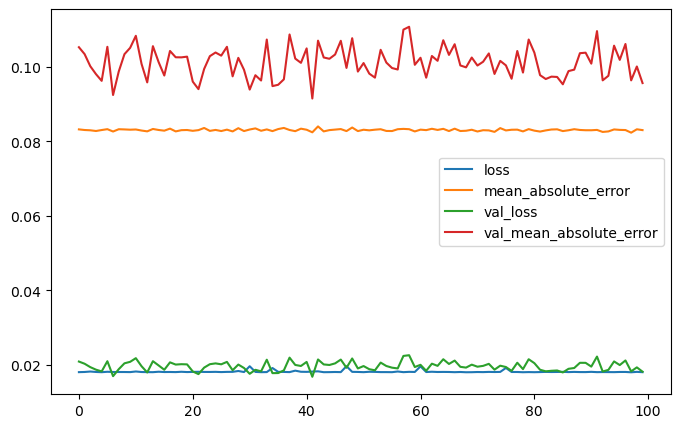

In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [47]:
metric = tf.keras.metrics.R2Score()
metric.update_state(np.squeeze(Y_test, axis=1), test_predictions)
result = metric.result()
result.numpy()

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub] name: 

In [48]:
m = tf.keras.metrics.MeanSquaredError()
m.update_state(Y_test, test_predictions)
m.result().numpy()

0.007170181

# another try

In [103]:
train, test = data[:round(len(data)*0.7)], data[round(len(data)*0.7):] 

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [105]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [106]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [107]:
length=21
batch_size = 1024
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size=batch_size)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(length, scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [126]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 100)               │     79,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_14 (Dense)                │ (None, 97)                │      9,797 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 88,997 (347.64 KB)

 Trainable params: 88,997 (347.64 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=batch_size)

In [128]:
model.fit_generator(generator, epochs=100,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

AttributeError: 'Sequential' object has no attribute 'fit_generator'